In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from smoother.smooth_SMBG_data import smooth_smbg_data

In [2]:
folder_path = os.path.join('../', 'processed_data', 'OhioT1DM.csv')
df = pd.read_csv(folder_path)

In [3]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 190966 entries, 2027-04-07 09:20:00 to 2022-01-27 23:40:00
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CGM                     166532 non-null  float64
 1   carbs                   189739 non-null  float64
 2   bolus                   190064 non-null  float64
 3   basal                   189750 non-null  float64
 4   galvanic_skin_response  147444 non-null  float64
 5   skin_temp               147590 non-null  float64
 6   acceleration            60967 non-null   float64
 7   workout_intensity       155379 non-null  float64
 8   is_test                 190966 non-null  bool   
 9   id                      190966 non-null  int64  
 10  heartrate               86811 non-null   float64
 11  air_temp                86626 non-null   float64
 12  steps                   91387 non-null   float64
dtypes: bool(1), float64(11), int64(1)
memory

In [18]:
subject_ids = df['id'].unique()
print(subject_ids)

[596 584 567 552 544 540 591 588 575 570 563 559]


In [19]:
subject_id = subject_ids[0]
subset_df = df[df['id'] == subject_id]
print(subset_df)

                     CGM  carbs  bolus  basal  galvanic_skin_response  \
date                                                                    
2027-04-07 09:20:00  NaN    NaN    NaN    0.6                     NaN   
2027-04-07 09:25:00  NaN    NaN    NaN    0.6                     NaN   
2027-04-07 09:30:00  NaN    NaN    NaN    0.6                     NaN   
2027-04-07 09:35:00  NaN    NaN    NaN    0.6                     NaN   
2027-04-07 09:40:00  NaN    NaN    NaN    0.6                     NaN   
...                  ...    ...    ...    ...                     ...   
2027-06-06 12:35:00  NaN    NaN    NaN    NaN                0.028561   
2027-06-06 12:40:00  NaN    NaN    NaN    NaN                0.019332   
2027-06-06 12:45:00  NaN    NaN    NaN    NaN                0.026087   
2027-06-06 12:50:00  NaN    NaN    NaN    NaN                0.030246   
2027-06-06 12:55:00  NaN    NaN    NaN    NaN                0.027716   

                     skin_temp  acceleration  work

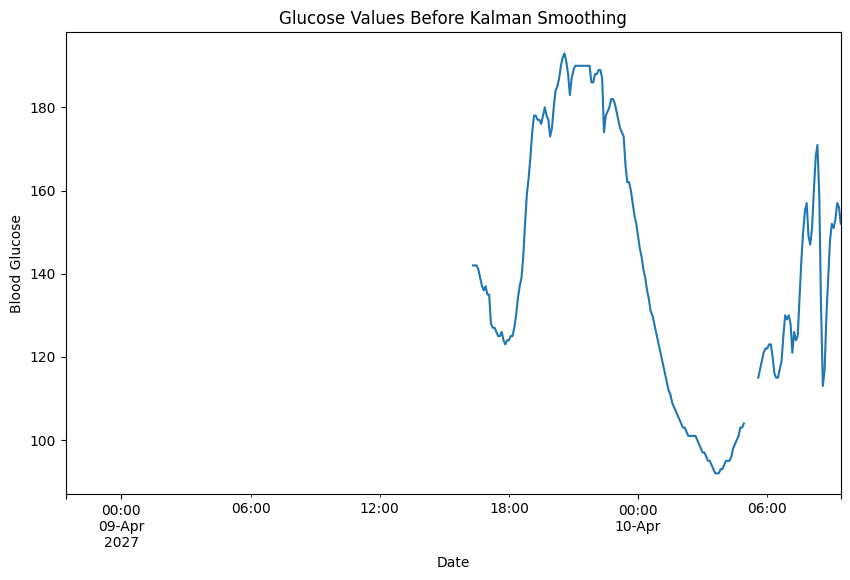

In [52]:
# TODO: Print all/some cgm values, visualize what happened before / after smoothing!
subset_df['CGM'].iloc[len(subset_df) // 40:2*len(subset_df) // 40].plot(figsize=(10, 6))

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Blood Glucose')
plt.title('Glucose Values Before Kalman Smoothing')

# Show the plot
plt.show()

In [70]:
# TODO: Fix kalman smoother to automatically detect mg / dl... There is an error now
glucose_values = np.array([val for val in subset_df['CGM'].values])[len(subset_df) // 20:2*len(subset_df) // 20]
dates = np.array(subset_df.index.values)[len(subset_df) // 20:2*len(subset_df) // 20]

In [71]:
smoother_result = smooth_smbg_data(dates, glucose_values)

Smoother flagged measurement 9 as outlier: t = 45.0, y = 192.0 [mmol/L].
Smoother flagged measurement 10 as outlier: t = 50.0, y = 194.0 [mmol/L].
Smoother flagged measurement 26 as outlier: t = 130.0, y = 192.0 [mmol/L].
Smoother flagged measurement 27 as outlier: t = 135.0, y = 191.0 [mmol/L].
Smoother flagged measurement 28 as outlier: t = 140.0, y = 192.0 [mmol/L].
Smoother flagged measurement 29 as outlier: t = 145.0, y = 192.0 [mmol/L].
Smoother flagged measurement 30 as outlier: t = 150.0, y = 189.0 [mmol/L].
Smoother flagged measurement 31 as outlier: t = 155.0, y = 183.0 [mmol/L].
Smoother flagged measurement 36 as outlier: t = 180.0, y = 146.0 [mmol/L].
Smoother flagged measurement 37 as outlier: t = 185.0, y = 141.0 [mmol/L].
Smoother flagged measurement 41 as outlier: t = 205.0, y = 148.0 [mmol/L].
Smoother flagged measurement 44 as outlier: t = 220.0, y = 127.0 [mmol/L].
Smoother flagged measurement 46 as outlier: t = 230.0, y = 123.0 [mmol/L].
Smoother flagged measurement

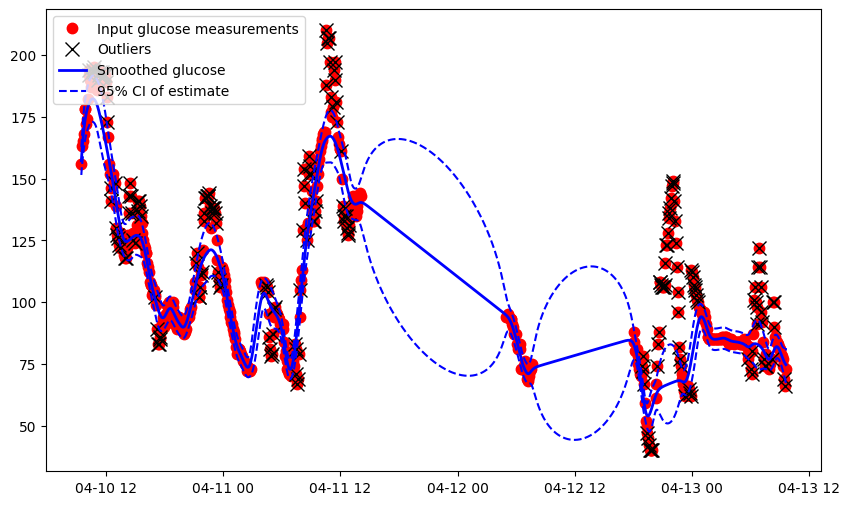

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(dates, glucose_values, 'r.', markersize=15)

# Plot the outliers with black crosses ('kx') and marker size 10
ol = smoother_result['outliers'] == 1
plt.plot(dates[ol], glucose_values[ol], 'kx', markersize=10)

# Plot the smoothed glucose values as a blue line with width 2
plt.plot(smoother_result['t_i'], smoother_result['y_smoothed'], 'b-', linewidth=2)

# Plot the 95% confidence interval as blue dashed lines
plt.plot(smoother_result['t_i'], smoother_result['y_smoothed'] + 2 * smoother_result['y_smoothed_sd'], 'b--')
plt.plot(smoother_result['t_i'], smoother_result['y_smoothed'] - 2 * smoother_result['y_smoothed_sd'], 'b--')

plt.legend(['Input glucose measurements', 'Outliers', 'Smoothed glucose', '95% CI of estimate'], loc='upper left')
plt.show()

In [73]:
dates

array(['2027-04-10T09:30:00.000000000', '2027-04-10T09:35:00.000000000',
       '2027-04-10T09:40:00.000000000', '2027-04-10T09:45:00.000000000',
       '2027-04-10T09:50:00.000000000', '2027-04-10T09:55:00.000000000',
       '2027-04-10T10:00:00.000000000', '2027-04-10T10:05:00.000000000',
       '2027-04-10T10:10:00.000000000', '2027-04-10T10:15:00.000000000',
       '2027-04-10T10:20:00.000000000', '2027-04-10T10:25:00.000000000',
       '2027-04-10T10:30:00.000000000', '2027-04-10T10:35:00.000000000',
       '2027-04-10T10:40:00.000000000', '2027-04-10T10:45:00.000000000',
       '2027-04-10T10:50:00.000000000', '2027-04-10T10:55:00.000000000',
       '2027-04-10T11:00:00.000000000', '2027-04-10T11:05:00.000000000',
       '2027-04-10T11:10:00.000000000', '2027-04-10T11:15:00.000000000',
       '2027-04-10T11:20:00.000000000', '2027-04-10T11:25:00.000000000',
       '2027-04-10T11:30:00.000000000', '2027-04-10T11:35:00.000000000',
       '2027-04-10T11:40:00.000000000', '2027-04-10

In [79]:
print(smoother_result['t_i'][-10:])
print(smoother_result['y_smoothed'][-10:])
print(smoother_result['y_smoothed_sd'][-10:])
smoother_result = smooth_smbg_data(dates, glucose_values)

DatetimeIndex(['2027-04-13 09:33:30', '2027-04-13 09:33:40',
               '2027-04-13 09:33:50', '2027-04-13 09:34:00',
               '2027-04-13 09:34:10', '2027-04-13 09:34:20',
               '2027-04-13 09:34:30', '2027-04-13 09:34:40',
               '2027-04-13 09:34:50', '2027-04-13 09:35:00'],
              dtype='datetime64[ns]', freq=None)
[74.77810566 74.76326542 74.74855723 74.73398075 74.71953561 74.70522144
 74.69103782 74.67698436 74.66306062 74.64926615]
[3.57612062 3.59256151 3.60910224 3.62574266 3.64248255 3.65932168
 3.67625976 3.69329646 3.71043141 2.87320132]
Smoother flagged measurement 9 as outlier: t = 45.0, y = 192.0 [mmol/L].
Smoother flagged measurement 10 as outlier: t = 50.0, y = 194.0 [mmol/L].
Smoother flagged measurement 26 as outlier: t = 130.0, y = 192.0 [mmol/L].
Smoother flagged measurement 27 as outlier: t = 135.0, y = 191.0 [mmol/L].
Smoother flagged measurement 28 as outlier: t = 140.0, y = 192.0 [mmol/L].
Smoother flagged measurement 29 as ou

In [78]:
print(smoother_result['y_smoothed_sd'].mean())
print(smoother_result['y_smoothed_sd'].max())


7.610498625601168
20.97734714657294


In [20]:
# SMOOTHENING ALL DATA
glucose_values = np.array(subset_df['CGM'].values)
dates = np.array(subset_df.index.values)
smoother_result = smooth_smbg_data(dates, glucose_values)

Autodetected mg/dL as unit
Smoother flagged measurement 624 as outlier: t = 8070.0, y = 3.4410034410034407 [mmol/L].
Smoother flagged measurement 625 as outlier: t = 8075.0, y = 6.271506271506271 [mmol/L].
Smoother flagged measurement 779 as outlier: t = 9595.0, y = 7.104007104007104 [mmol/L].
Smoother flagged measurement 1734 as outlier: t = 14395.0, y = 13.264513264513264 [mmol/L].
Smoother flagged measurement 2199 as outlier: t = 19905.0, y = 6.438006438006438 [mmol/L].
Smoother flagged measurement 2200 as outlier: t = 19910.0, y = 9.37950937950938 [mmol/L].
Smoother flagged measurement 2367 as outlier: t = 20930.0, y = 10.71151071151071 [mmol/L].
Smoother flagged measurement 2508 as outlier: t = 21635.0, y = 10.989010989010989 [mmol/L].
Smoother flagged measurement 2730 as outlier: t = 22750.0, y = 5.772005772005771 [mmol/L].
Smoother flagged measurement 3916 as outlier: t = 29285.0, y = 5.772005772005771 [mmol/L].
Smoother flagged measurement 5538 as outlier: t = 38705.0, y = 7.10

In [21]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17324 entries, 2027-04-07 09:20:00 to 2027-06-06 12:55:00
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CGM                     13620 non-null  float64
 1   carbs                   17258 non-null  float64
 2   bolus                   17258 non-null  float64
 3   basal                   17292 non-null  float64
 4   galvanic_skin_response  9863 non-null   float64
 5   skin_temp               9863 non-null   float64
 6   acceleration            9863 non-null   float64
 7   workout_intensity       17324 non-null  float64
 8   is_test                 17324 non-null  bool   
 9   id                      17324 non-null  int64  
 10  heartrate               0 non-null      float64
 11  air_temp                0 non-null      float64
 12  steps                   0 non-null      float64
 13  CGM_smoothed            16632 non-null  float64
dtypes: 

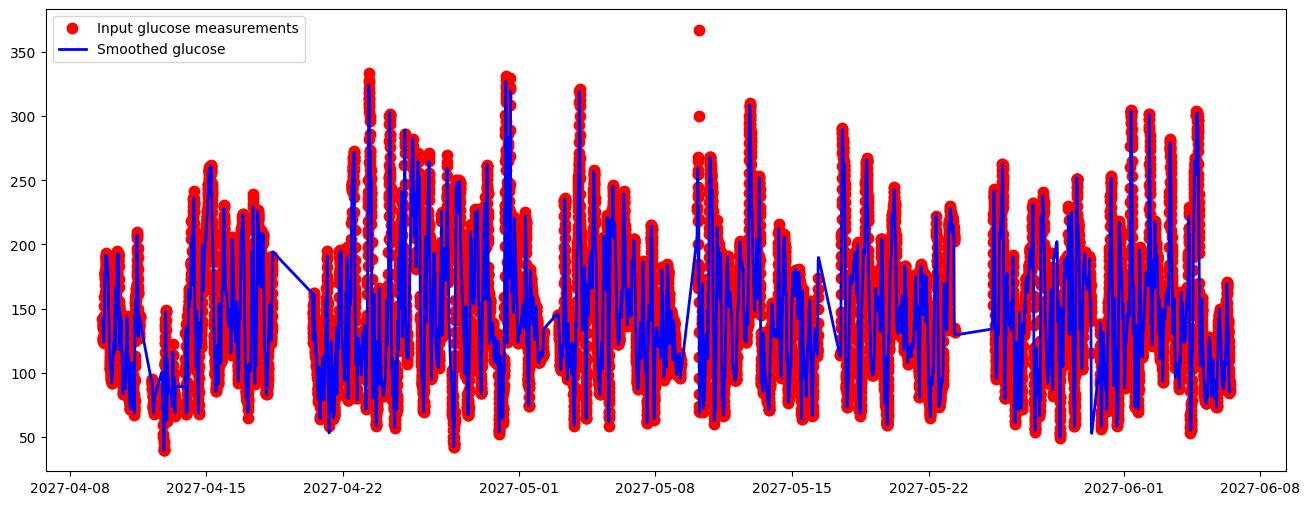

In [24]:
plt.figure(figsize=(16, 6))

#zoom_start = pd.Timestamp("2027-04-13")
#zoom_end = pd.Timestamp("2027-04-16")

plt.plot(dates, glucose_values, 'r.', markersize=15)
plt.plot(smoother_result['t_i'], smoother_result['y_smoothed'], 'b-', linewidth=2)
plt.legend(['Input glucose measurements', 'Smoothed glucose'], loc='upper left')
#plt.xlim(zoom_start, zoom_end)  # Set x-axis range
plt.show()

In [ ]:
# TODO: Add the smoothened data to the original dataframe, "CGM_smoothened", and add nans if gap higher than two hours
# TODO: Iterate through each subset df

In [23]:
print(smoother_result['t_i'][0])
print(smoother_result['t_i'][-1])

2027-04-07 09:20:00
2027-06-06 12:55:00


In [48]:
smoothed_df = pd.DataFrame({'y_smoothed': smoother_result['y_smoothed']}, index=smoother_result['t_i'])
# Reindex the smoothed data to match the 5-minute intervals in the original DataFrame
subset_df['CGM_smoothed'] = smoothed_df['y_smoothed'].reindex(subset_df.index, method='nearest')
subset_df[['CGM', 'CGM_smoothed']]

,CGM,CGM_smoothed
date,,
2027-04-07 09:20:00,NaN,NaN
2027-04-07 09:25:00,NaN,NaN
2027-04-07 09:30:00,NaN,NaN
2027-04-07 09:35:00,NaN,NaN
2027-04-07 09:40:00,NaN,NaN
...,...,...
2027-06-06 12:35:00,NaN,NaN
2027-06-06 12:40:00,NaN,NaN
2027-06-06 12:45:00,NaN,NaN


In [49]:
subset_df[['CGM', 'CGM_smoothed']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17324 entries, 2027-04-07 09:20:00 to 2027-06-06 12:55:00
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CGM           13620 non-null  float64
 1   CGM_smoothed  16632 non-null  float64
dtypes: float64(2)
memory usage: 406.0 KB


In [50]:
# Add nans to CGM smoothened if CGM is nan for more than two hours
subset_df = subset_df.copy()  # Explicitly create a new copy to avoid warnings
window_size = 24
rolling_nan_count = subset_df['CGM'].isna().rolling(window=window_size, min_periods=1).sum()
full_nan_indices = rolling_nan_count[rolling_nan_count == window_size].index

# Iterate over these indices and set all rows in the rolling window to NaN in 'CGM_smoothed'
for idx in full_nan_indices:
    # Find the window for the current index
    window_start = idx - pd.Timedelta(minutes=5 * (window_size - 1))  # Start of the rolling window
    window_end = idx  # Current index is the end of the rolling window
    # Mask 'CGM_smoothed' values within this window
    subset_df.loc[window_start:window_end, 'CGM_smoothed'] = np.nan

In [51]:
subset_df[['CGM', 'CGM_smoothed']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17324 entries, 2027-04-07 09:20:00 to 2027-06-06 12:55:00
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CGM           13620 non-null  float64
 1   CGM_smoothed  13703 non-null  float64
dtypes: float64(2)
memory usage: 922.1 KB


<Figure size 1600x600 with 0 Axes>

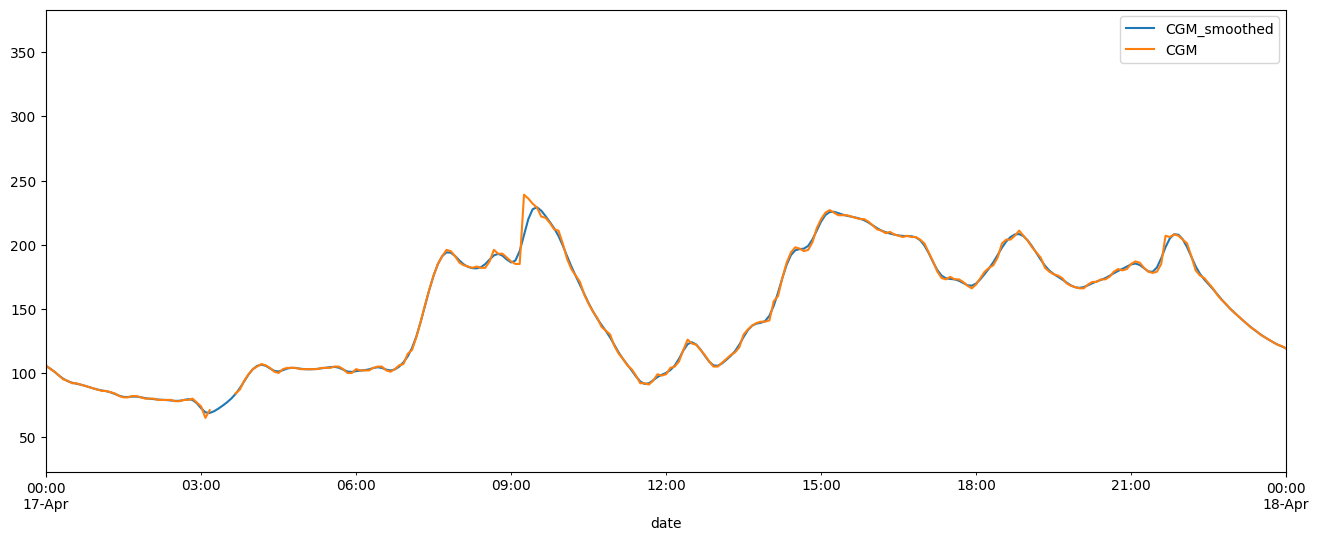

In [57]:
plt.figure(figsize=(16, 6))

zoom_start = pd.Timestamp("2027-04-17")
zoom_end = pd.Timestamp("2027-04-18")

subset_df[['CGM_smoothed', 'CGM']].plot(figsize=(16, 6))
#plt.plot(dates, glucose_values, 'r.', markersize=15)
#plt.plot(smoother_result['t_i'], smoother_result['y_smoothed'], 'b-', linewidth=2)
#plt.legend(['Input glucose measurements', 'Smoothed glucose'], loc='upper left')
plt.xlim(zoom_start, zoom_end)  # Set x-axis range
plt.show()